# Task 5: Exploratory Data Analysis - Sports ( Indian Premier League ) 

Data Science and Bussiness Analytics - The SPARKS Foundation

# Prepared by - ANKAN DUTTA

In [2]:
#importing the necessary libraries for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
#importing the two given dataset

deliveries=pd.read_csv(r'C:\Users\ANKAN\Desktop\DATA ANALYTICS\IPL_ANALYSIS\deliveries.csv')
matches= pd.read_csv(r'C:\Users\ANKAN\Desktop\DATA ANALYTICS\IPL_ANALYSIS\matches.csv')


In [7]:
# matches dataset overview
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [8]:
# Column info in matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
# describing column info of matches
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
# Summary of all IPL matches 2008-2019
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [5]:
#for checking the null variable : matches.isnull().sum()

# deliveres.csv dataset peek

deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [6]:
# Describing deliveries.csv dataset
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
# Summary of all IPL matches deliveries 2008-2019
deliveries.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

# Combining the two dataset for more clear overview

In [9]:
#combining the datasets matches and deliveries

df = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [10]:
# merged dataset overview

df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Visualising & Analysing the merged Dataset


# 1. Hosting venue analysis

Text(0, 0.5, 'Number of matches')

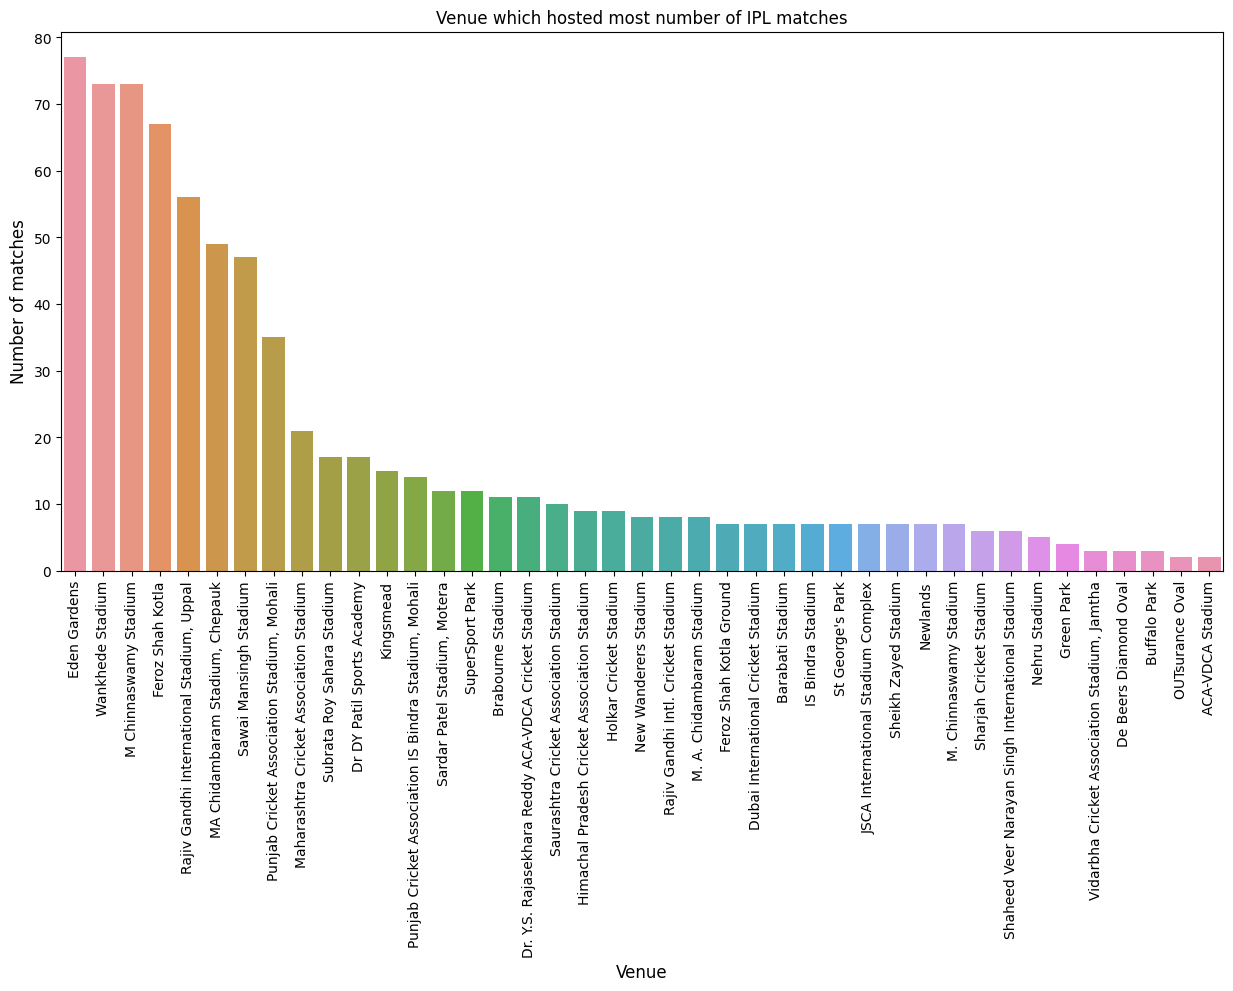

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='venue',data=matches ,order = df['venue'].value_counts().index)
plt.title('Venue which hosted most number of IPL matches', fontsize= 12)
plt.xlabel('Venue', fontsize= 12)
plt.xticks(rotation= 90)
plt.ylabel('Number of matches', fontsize= 12)

# 2. Number of matches played in each season

Text(0, 0.5, 'Number of matches')

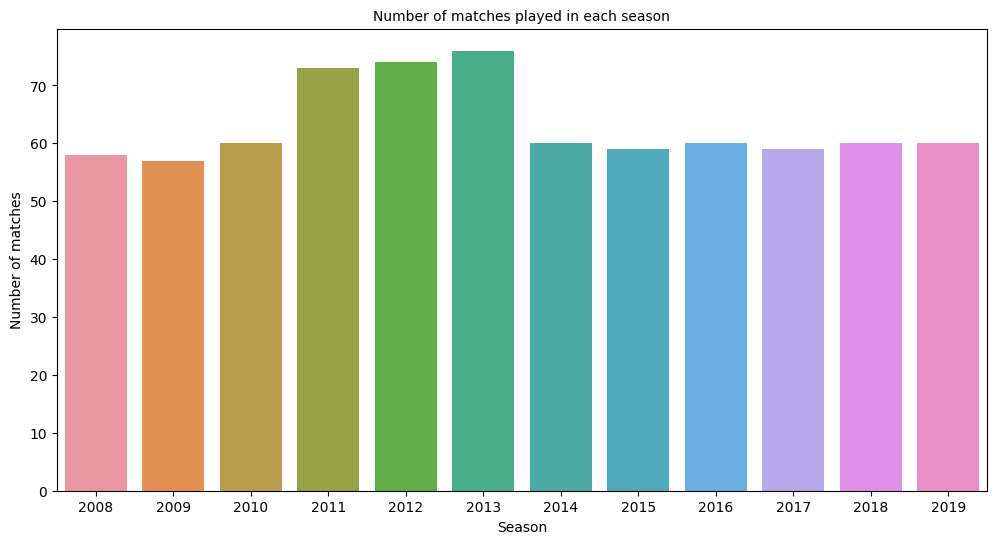

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches)
plt.title('Number of matches played in each season', fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Number of matches', fontsize=10)

# 3. Teams playing in each season

Text(0, 0.5, 'Number of Team')

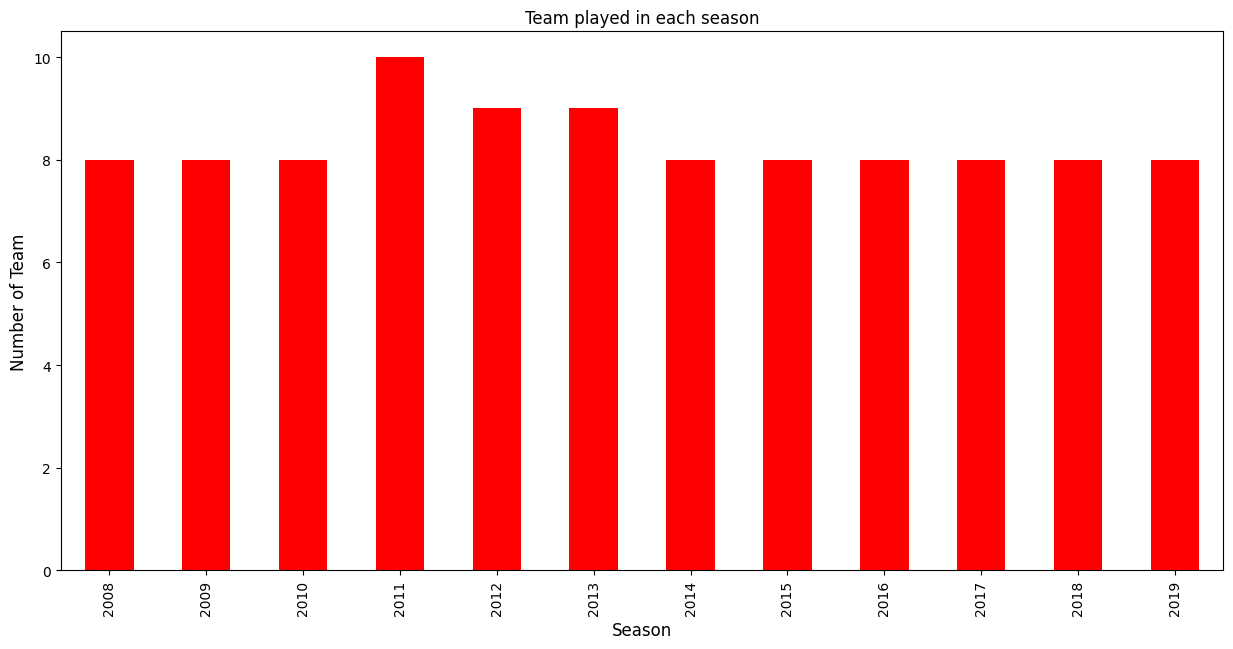

In [18]:

plt.figure(figsize=(15,7))
matches.groupby('season')['team1'].nunique().plot(kind='bar', color='r')
plt.title('Team played in each season', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Team', fontsize=12)

# 4. Winning Teams in different seasons

In [35]:

winning_teams = matches[['season','winner']]
winner_team ={}
for i in sorted(winning_teams.season.unique()):
    winner_team[i] = winning_teams[winning_teams.season ==i]['winner'].tail(1).values[0]
    
winner_IPL = pd.Series(winner_team)
winner_IPL = pd.DataFrame(winner_IPL, columns=['winner'])
print("season",winner_IPL)

season                      winner
2008       Rajasthan Royals
2009        Deccan Chargers
2010    Chennai Super Kings
2011    Chennai Super Kings
2012  Kolkata Knight Riders
2013         Mumbai Indians
2014  Kolkata Knight Riders
2015         Mumbai Indians
2016    Sunrisers Hyderabad
2017         Mumbai Indians
2018    Chennai Super Kings
2019         Mumbai Indians


Text(0, 0.5, 'Number of seasons')

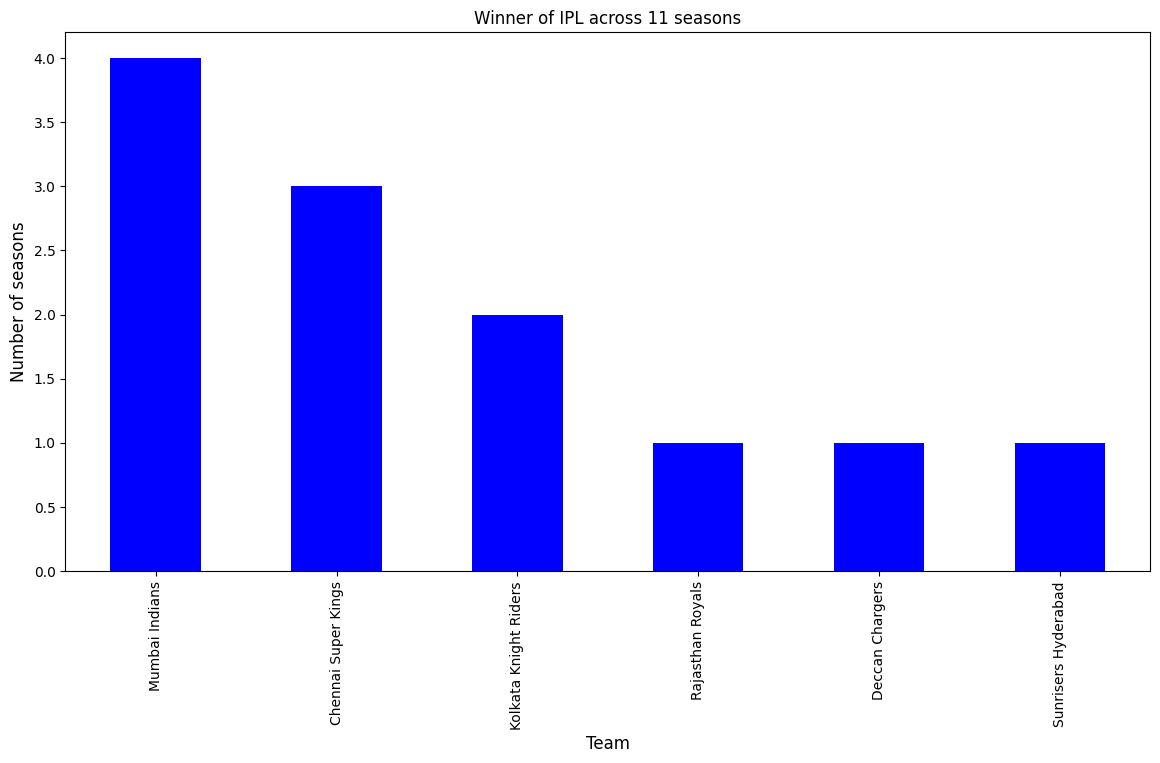

In [38]:
plt.figure(figsize=(14,7))
winner_IPL['winner'].value_counts().plot(kind='bar', color='b')
plt.title('Winner of IPL across 11 seasons', fontsize=12)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of seasons', fontsize=12)

# 5. Teams who have won most no. of matches from 2008-2019

Text(0, 0.5, 'Total Matches Won')

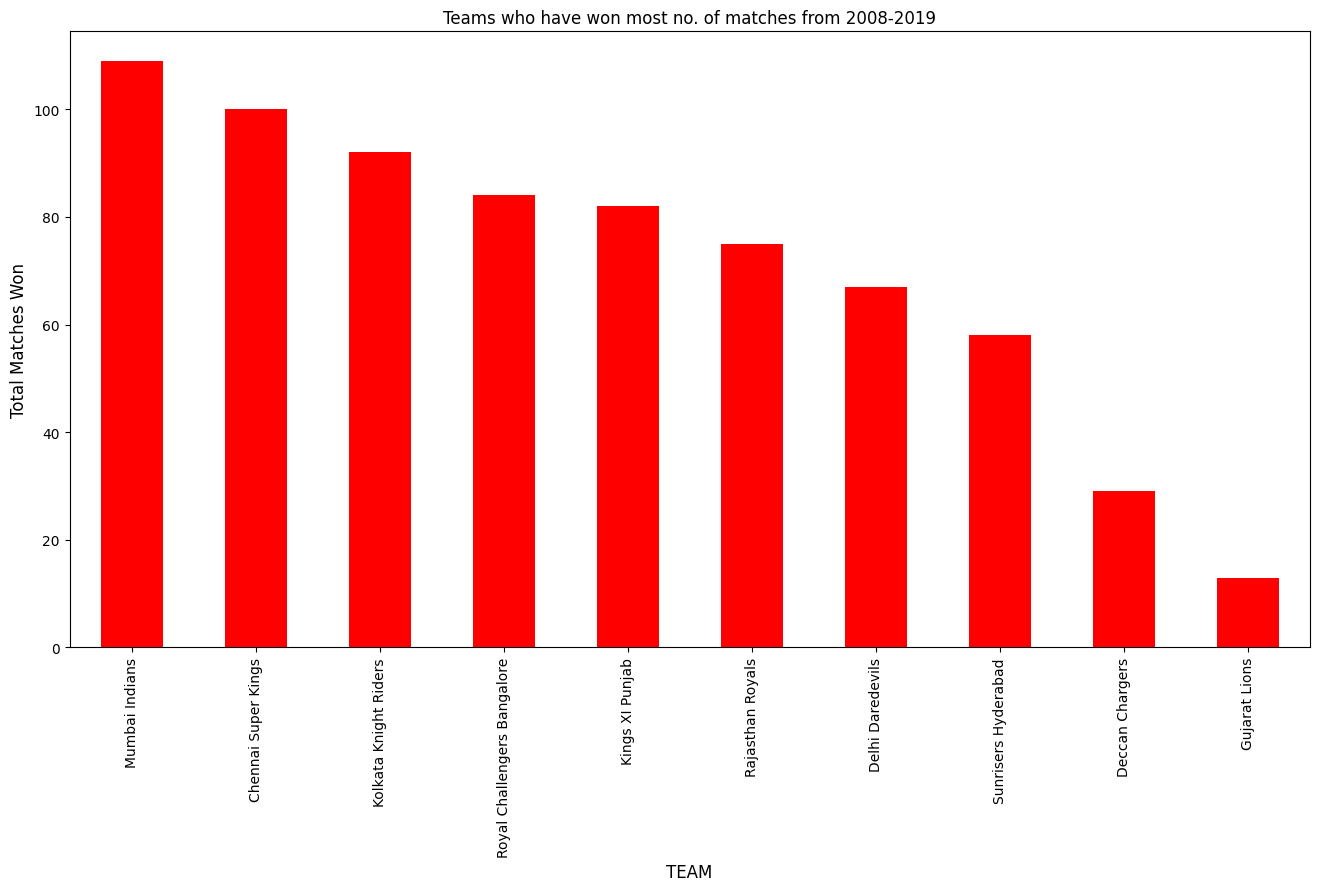

In [61]:
matches.groupby('winner')['winner'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,8), color='r')

plt.title('Teams who have won most no. of matches from 2008-2019', fontsize=12)
plt.xlabel('TEAM', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Total Matches Won', fontsize=12)

# 6. Toss Analysis

Text(0.5, 1.0, 'Decision taken by captain after winning toss')

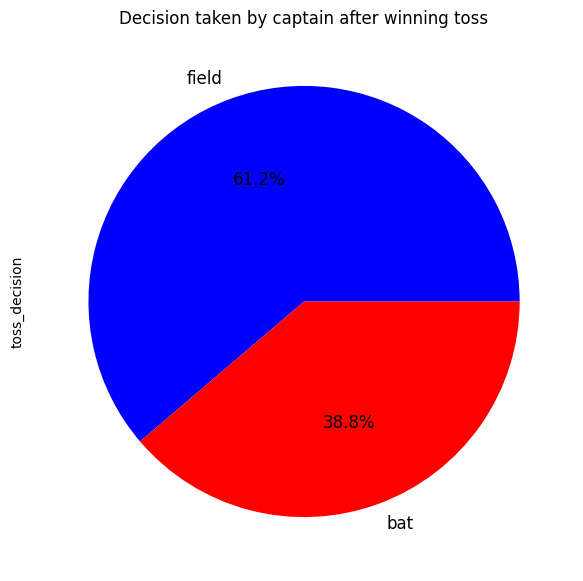

In [40]:
plt.figure(figsize=(15,7))
(matches['toss_decision'].value_counts()).plot(kind='pie',autopct = '%1.1f%%', colors=['b','r'], fontsize=12)
plt.title('Decision taken by captain after winning toss', fontsize=12)

# 7. Relationship b/w Toss decision & Winning

Text(0, 0.5, 'Frequency')

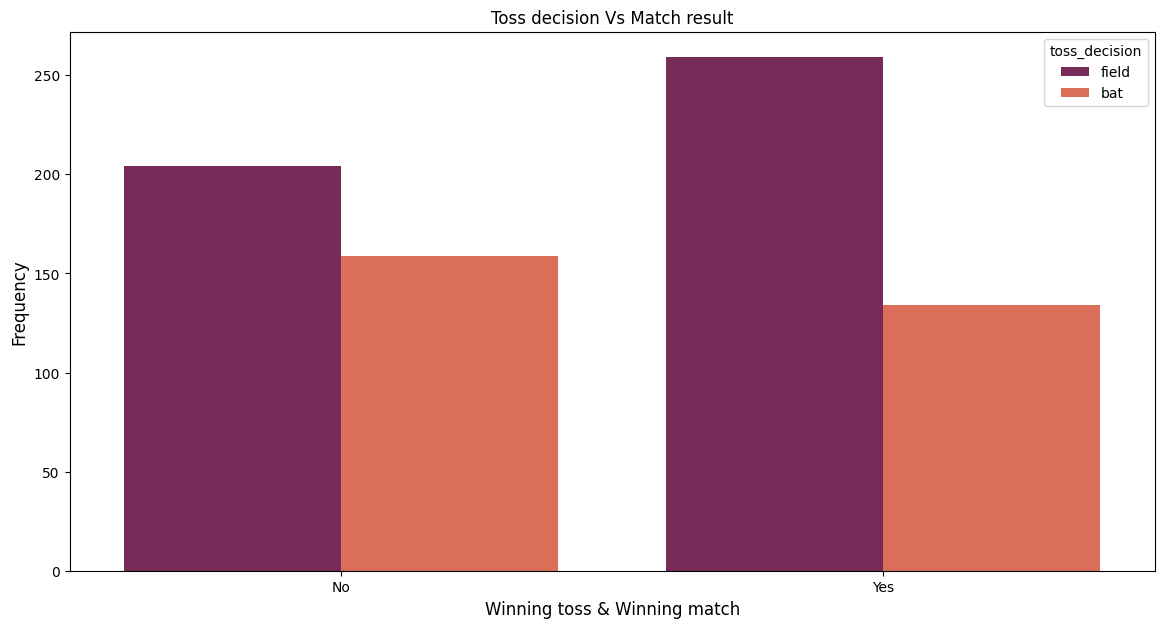

In [46]:
matches['tosswin_matchwin'] = np.where((matches.toss_winner == matches.winner), 'Yes','No')

plt.figure(figsize=(14,7))
sns.countplot(x='tosswin_matchwin',data = matches, hue='toss_decision',palette = 'rocket' )
plt.title('Toss decision Vs Match result', fontsize=12)
plt.xlabel('Winning toss & Winning match', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 8. Team wise Toss decision

Text(0, 0.5, 'Frequency')

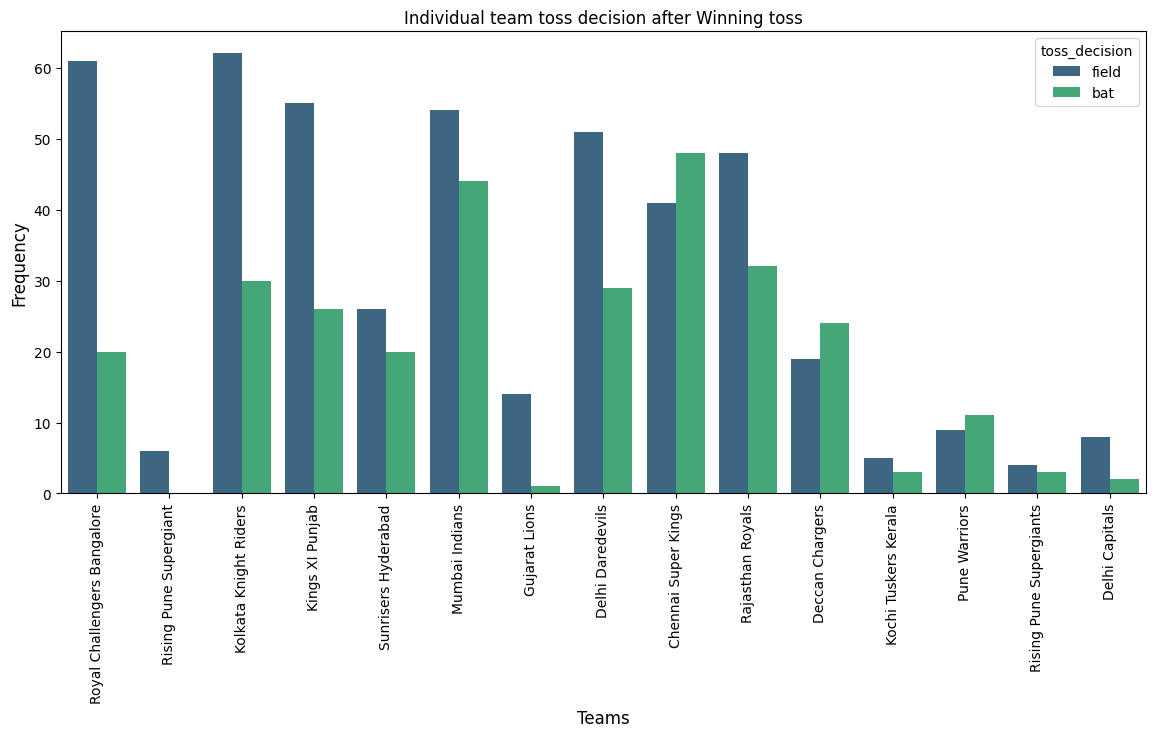

In [45]:
plt.figure(figsize=(14,6))
sns.countplot(x='toss_winner',data = matches, hue='toss_decision',palette='viridis')
plt.title('Individual team toss decision after Winning toss', fontsize=12)
plt.xlabel('Teams', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=12)

# 9. Top wicket takers of IPL

Text(0, 0.5, 'Total Wicket Taken')

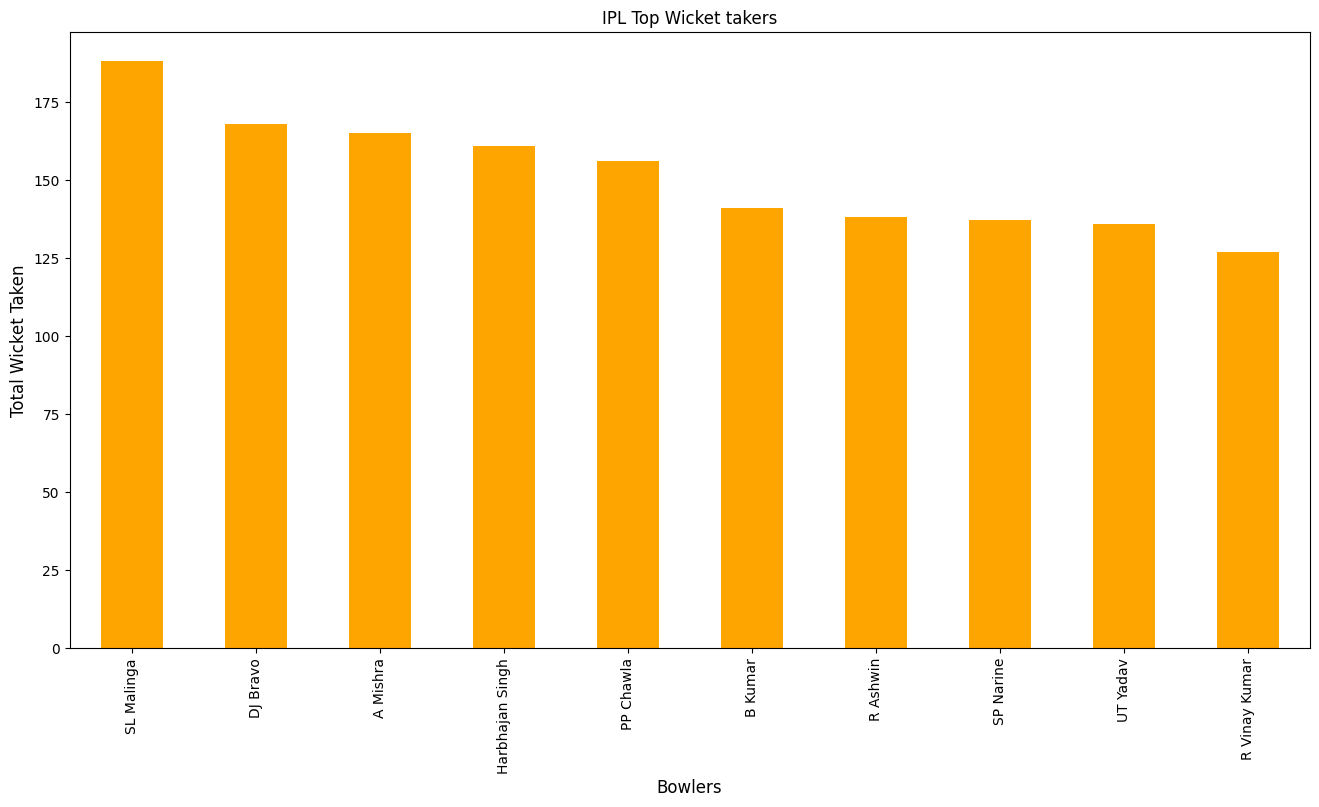

In [51]:
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(16,8), color='orange')
plt.title('IPL Top Wicket takers', fontsize=12)
plt.xlabel('Bowlers', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Total Wicket Taken', fontsize=12)

# 10. Top run getters of IPL

Text(0, 0.5, 'Total runs scored')

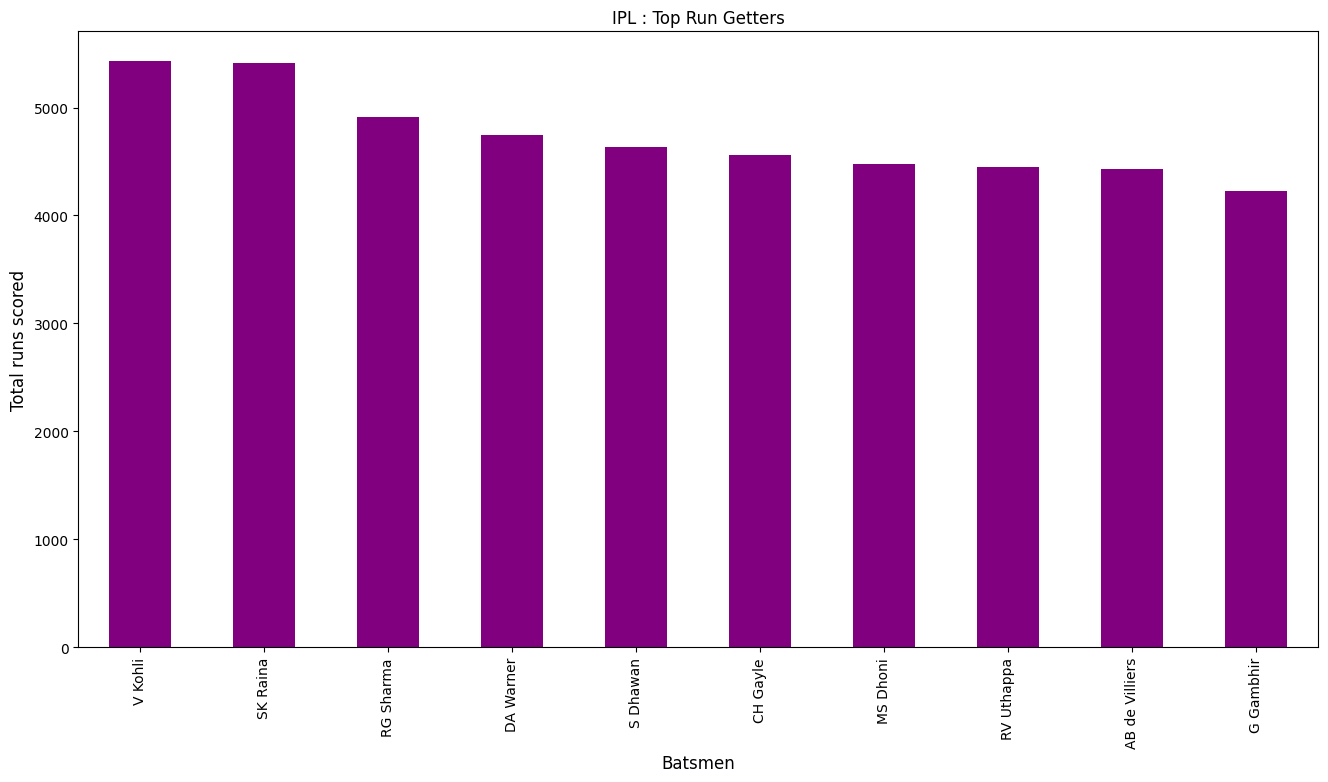

In [52]:
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,8), color='purple')
plt.title('IPL : Top Run Getters', fontsize=12)
plt.xlabel('Batsmen', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Total runs scored', fontsize=12)

# 11. Consistency of Batsman

<AxesSubplot: >

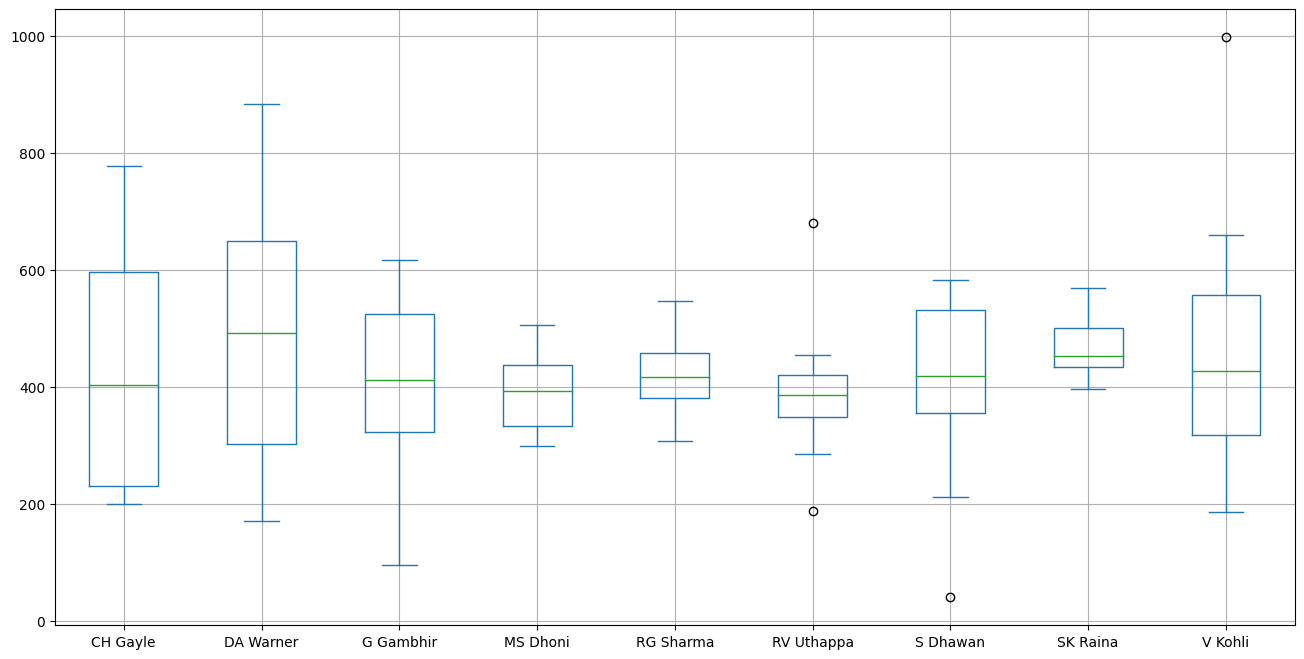

In [53]:

cons_batsman = df[df.batsman.isin(['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan','CH Gayle','MS Dhoni',
                                         'RV Uthappa', 'AB de Villers', 'G Gambhir'])]
[['batsman', 'season', 'total_runs']]

cons_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind='box', figsize=(16,8), grid='-')

# 12. Man of the match Count

Text(0, 0.5, 'Frequency')

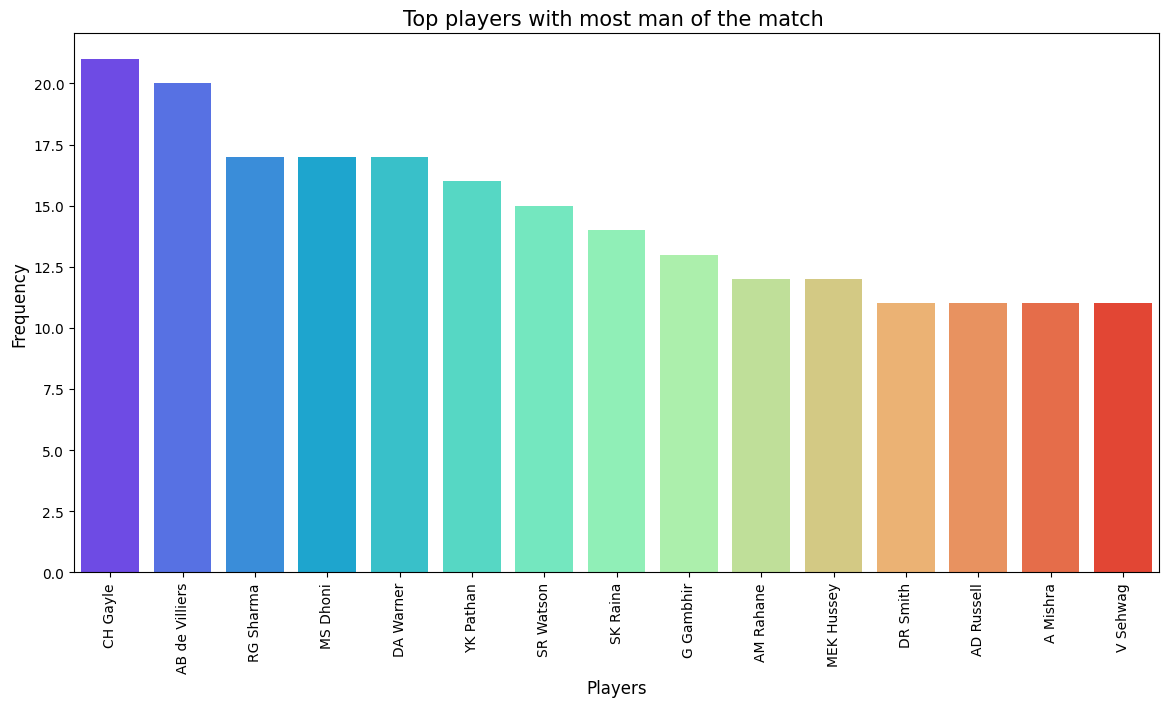

In [54]:
plt.figure(figsize=(14,7))
sns.countplot(x='player_of_match',data = matches,order=df['player_of_match'].value_counts().head(15).index , palette='rainbow')
plt.title('Top players with most man of the match ', fontsize=15)
plt.xlabel('Players', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=12)

# 13. Strike rates of batsman

In [55]:
#we will consider batsmen, who played most of the seasons

no_of_balls = pd.DataFrame(df.groupby('batsman')['ball'].count())
runs = pd.DataFrame(df.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(df.groupby('batsman')['season'].nunique())

strike_rate = pd.DataFrame({'balls':no_of_balls['ball'], 'run':runs['batsman_runs'], 'season':seasons['season']})
strike_rate.reset_index(inplace = True)
strike_rate['strike_rate'] = (strike_rate['run']/strike_rate['balls'])*100
highest_strike_rate = strike_rate[strike_rate.season.isin([9,10,11])][['season','batsman','strike_rate']].sort_values(by='strike_rate',ascending = False)
highest_strike_rate.head()

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
188,9,JA Morkel,136.938202


Text(0, 0.5, 'Strike Rate')

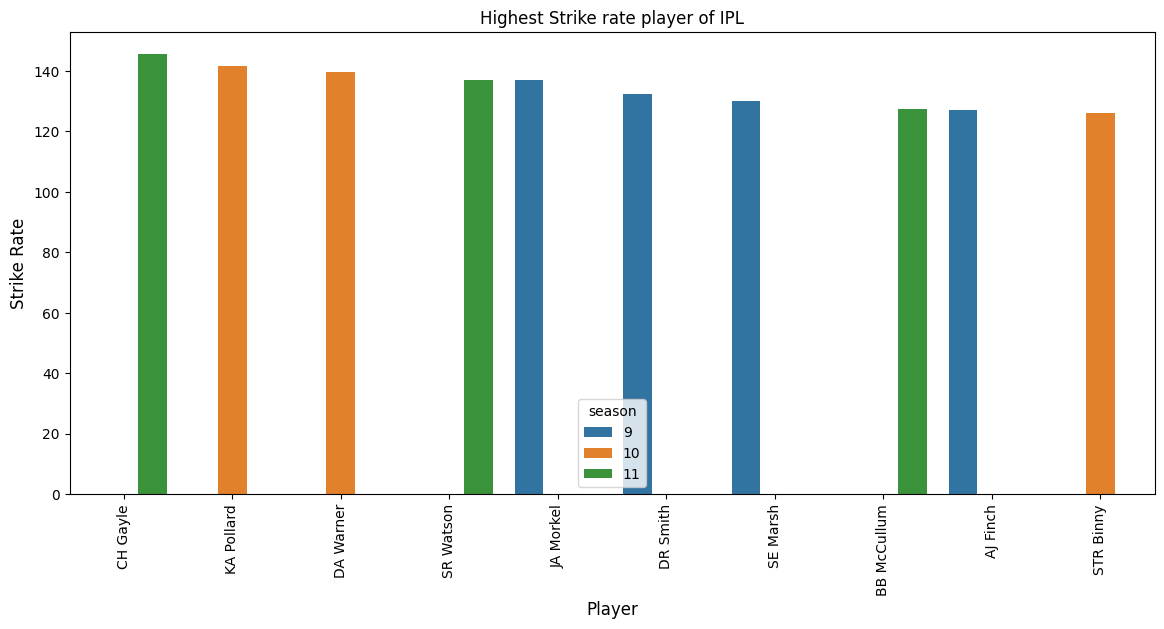

In [56]:
plt.figure(figsize=(14,6))
sns.barplot(x='batsman', y='strike_rate', data=highest_strike_rate.head(10), hue='season')
plt.title('Highest Strike rate player of IPL', fontsize=12)
plt.xlabel('Player', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Strike Rate', fontsize=12)

# 14. Dismissal Types in every Season 

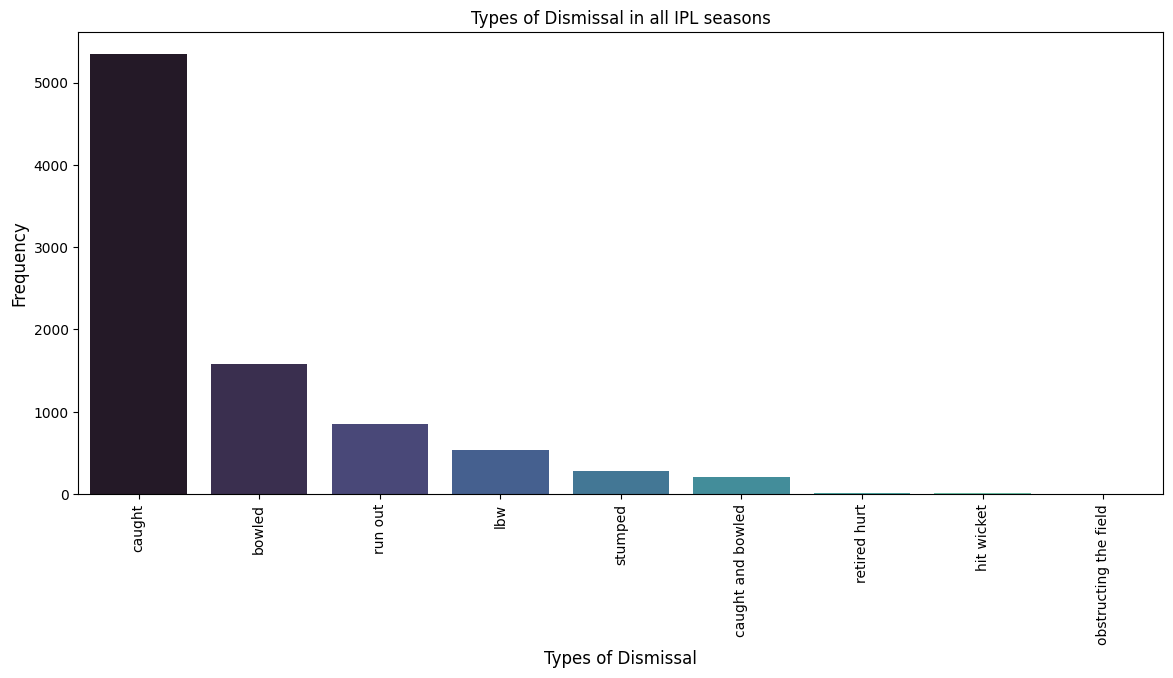

In [62]:
plt.figure(figsize=(14,6))
dismissal_type = deliveries.dismissal_kind.value_counts()
sns.barplot(x = dismissal_type.index, y = dismissal_type,palette="mako")
plt.title('Types of Dismissal in all IPL seasons', fontsize=12)
plt.xlabel('Types of Dismissal', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Final Analysis : 

In [63]:
# Compaines/Advertisers should invest/market on the following teams

In [64]:
# Compaines/Advertisers should invest/market on the following Batsmen

In [66]:
# Compaines/Advertisers should invest/market on the following Bowlers

In [68]:
# Compaines/Advertisers should invest/market on the following Venues

# End of Data Analysis